<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Mod_2_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appreciating, Interpreting and Visualizing Data
Lab 1: Basic plots

*Using matplotlib for data visualization*

It helps in 2D data visualization.We can represent data in form of graphes and visualisation for easy analysis of dat nad find the insights of the data.

In [1]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

*Loading the dataset*

In [3]:
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [6]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

Scatter plot of the automobile dataset

Scatter plots are used for analyzing the relationship between variables, and the relationship between them is represented by dots.

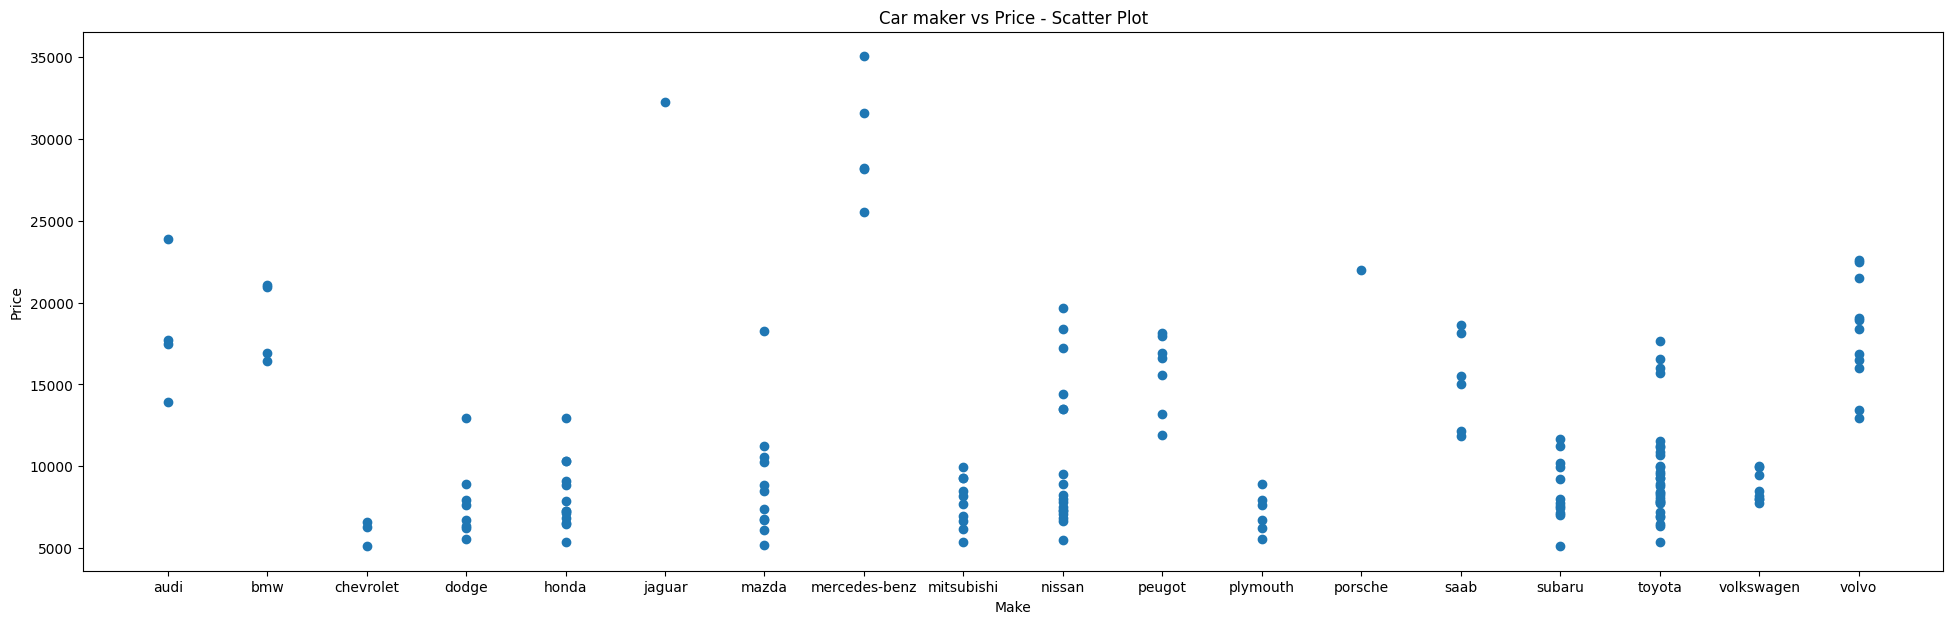

In [7]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Boxplot

When a set of data values with characteristics like the minimum, first quartile, median, third quartile, and maximum are displayed, a box plot, also referred to as a whisker plot, is formed.


Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

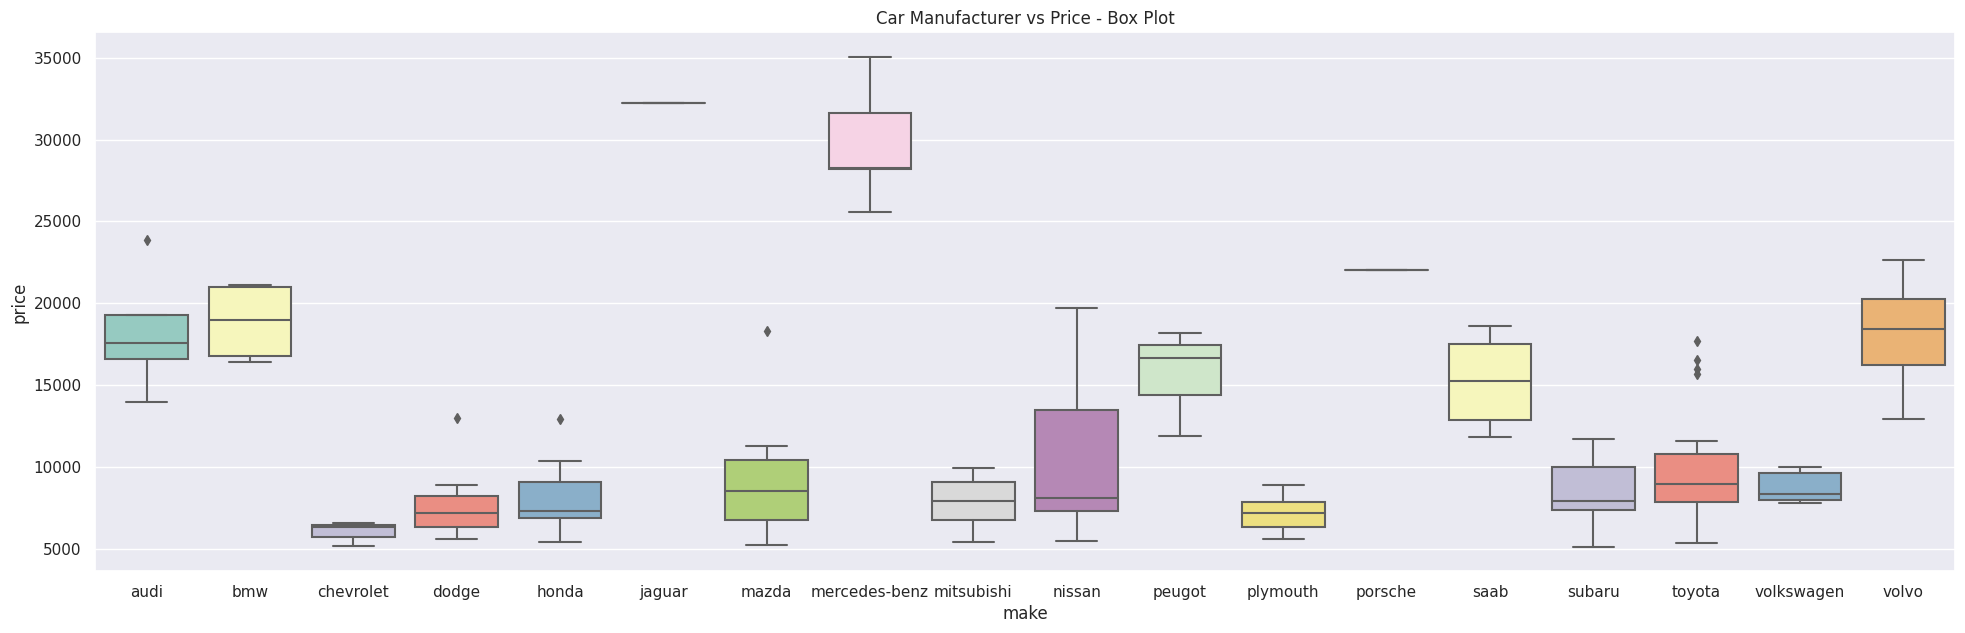

In [8]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

Violin plot

A mix of a box plot and a kernel density plot, a violin plot illustrates data peaks. The distribution of numerical data is visualized using it. Violin plots display both summary statistics and the density of each variable, in contrast to box plots, which can only display summary statistics.

Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

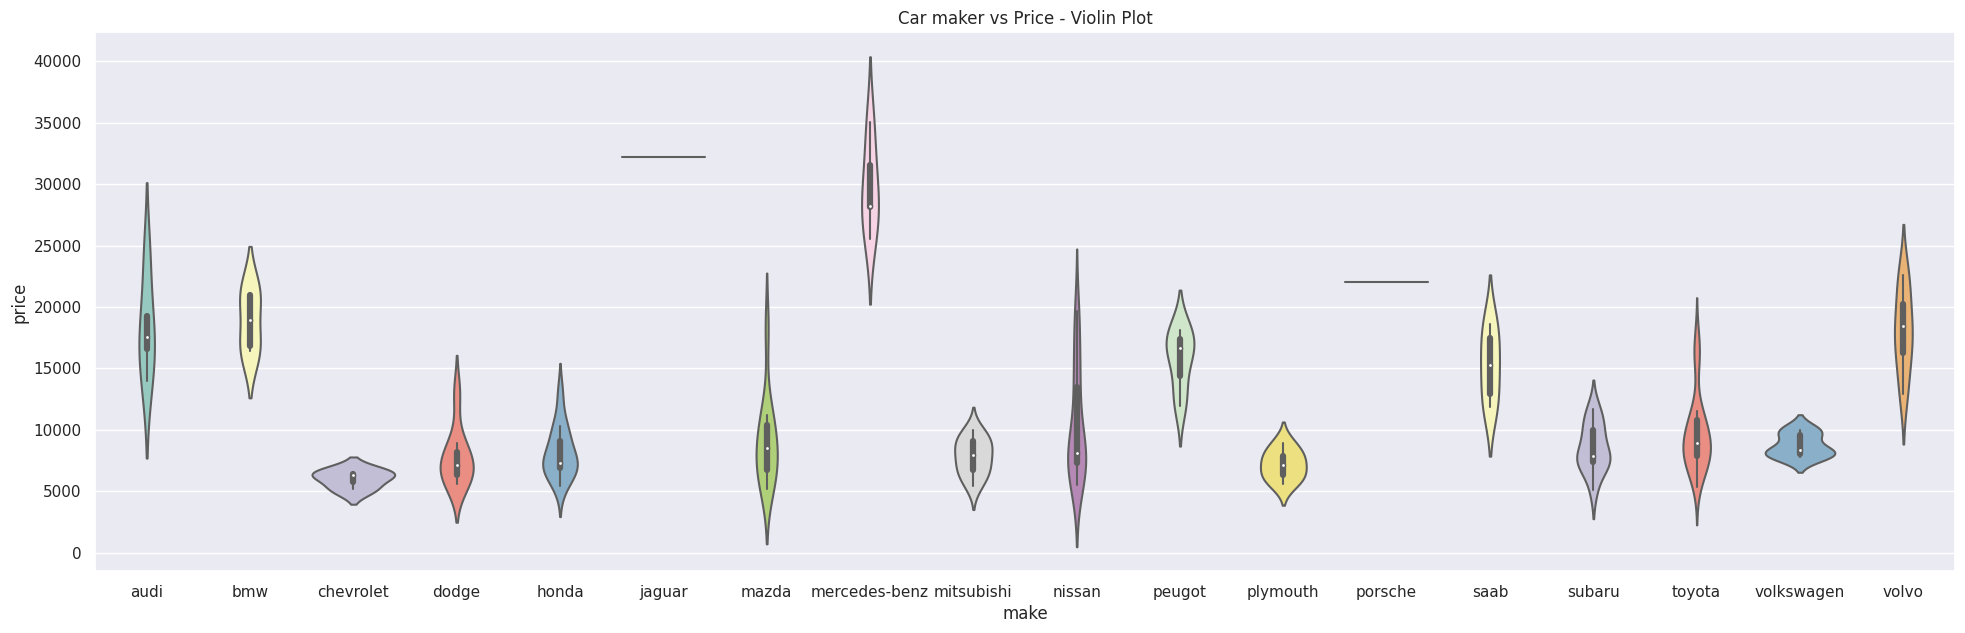

In [9]:
sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Swarm plot

A swarmplot makes the distribution easier to interpret by displaying all the data points. Understanding the data's distribution across a categorical attribute and the continuous variable's variation within a category is also helpful.


Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

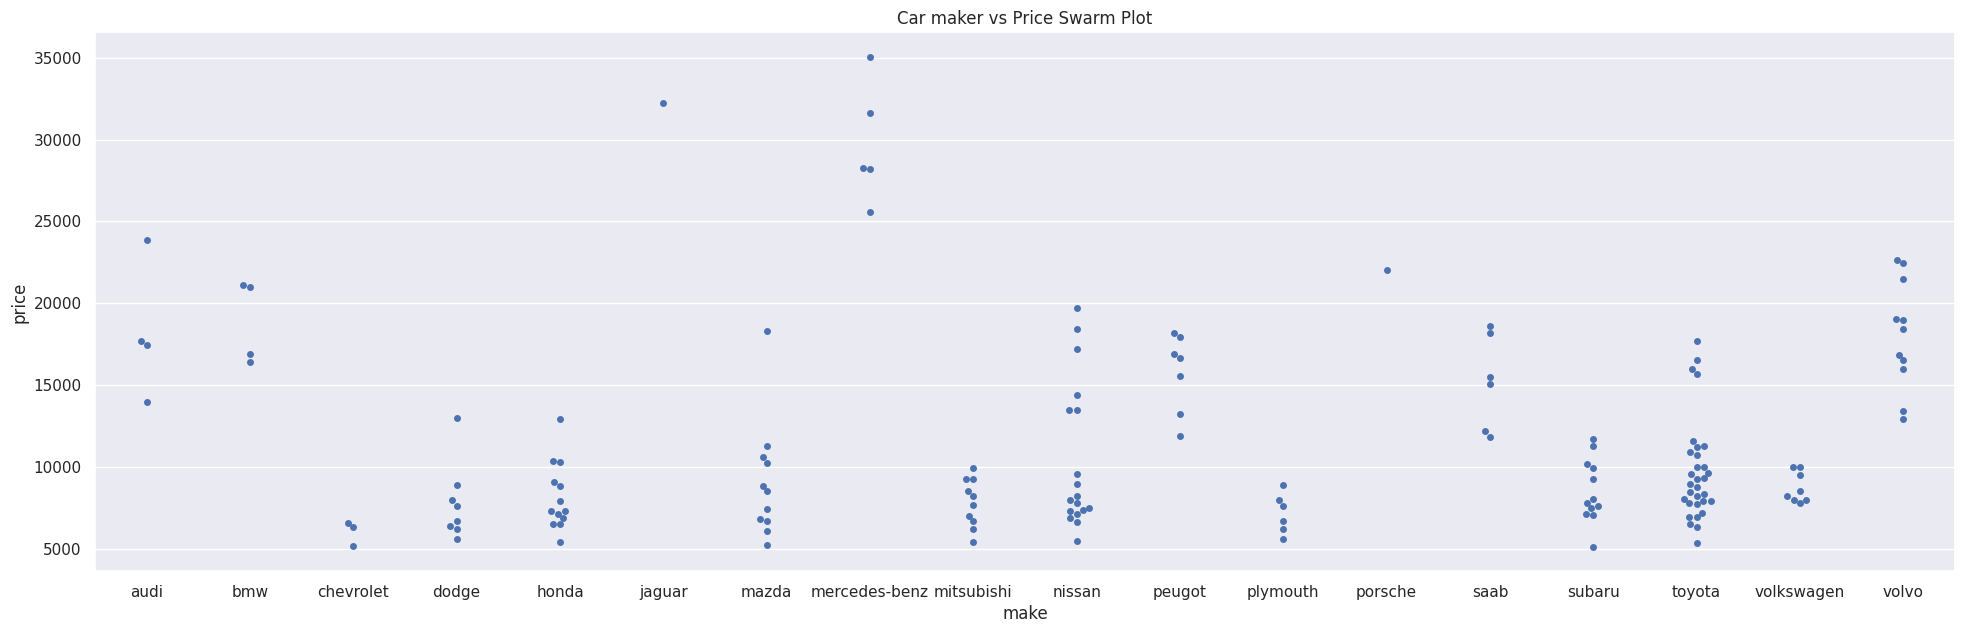

In [10]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

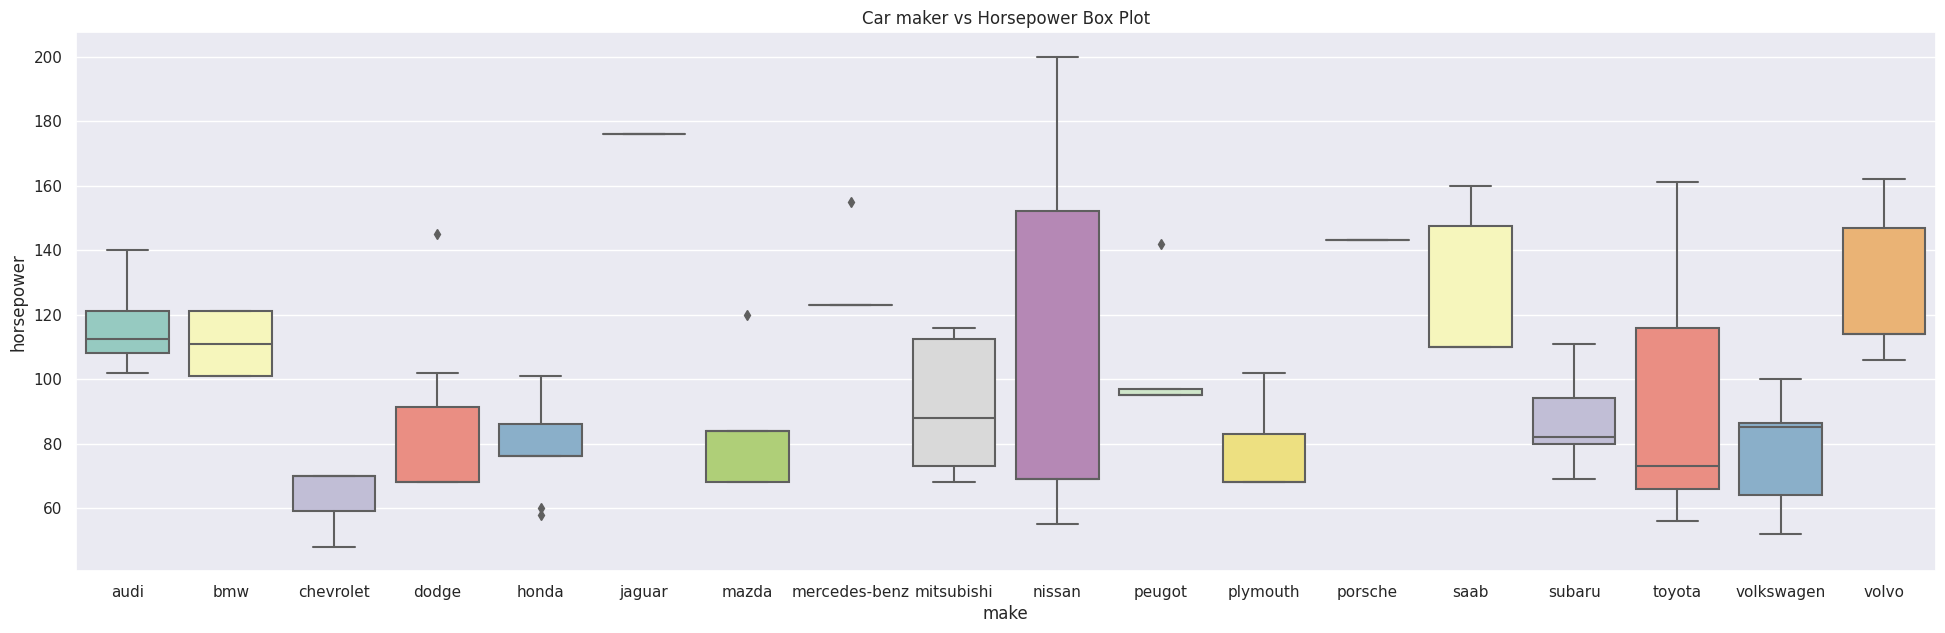

In [11]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')

 Carmakers like Jaguar and Porsche have most of their cars with very high HP. A reasonable next step would be to see, if this new interesting feature has some correlation with target variable "price".

<Axes: xlabel='horsepower', ylabel='price'>

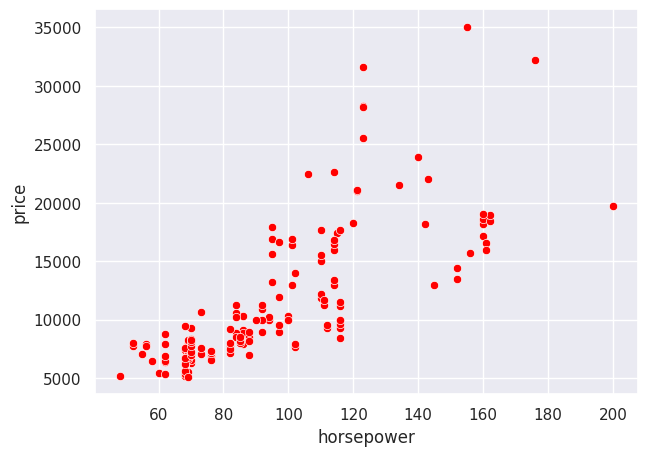

In [12]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "red")

Joint plot

The joint plot is a way of understanding the relationship between two variables and the distribution of individuals of each variable. The joint plot mainly consists of three separate plots in which, one of it was the middle figure that is used to see the relationship between x and y.

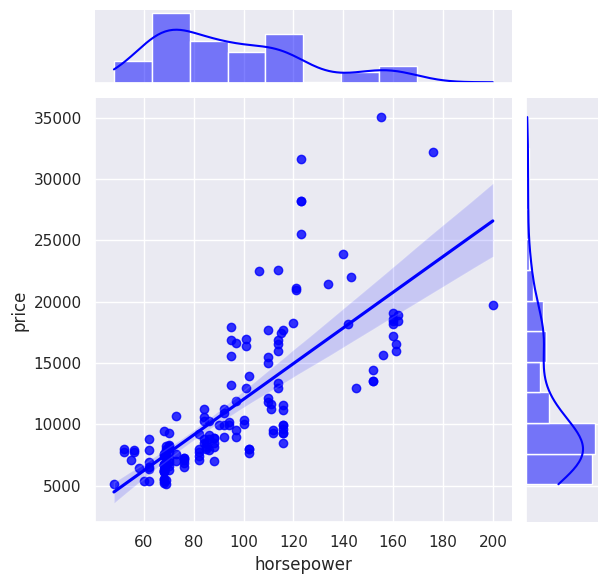

In [13]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'blue')

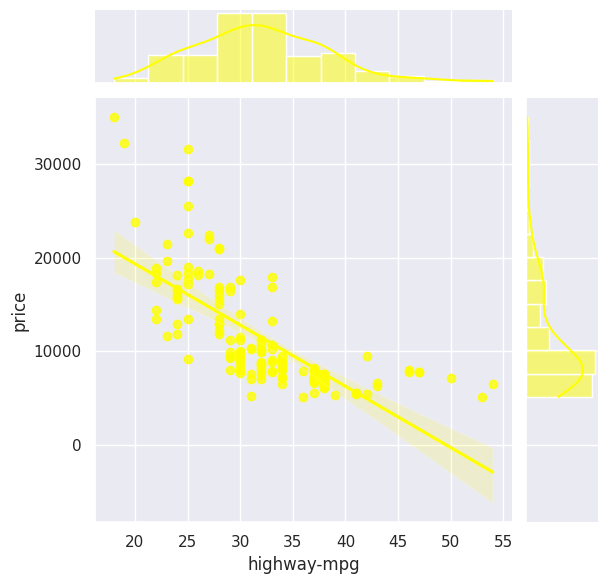

In [14]:
feature = "highway-mpg"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'yellow')

Text(0.5, 1.0, 'Body style vs Price Box Plot')

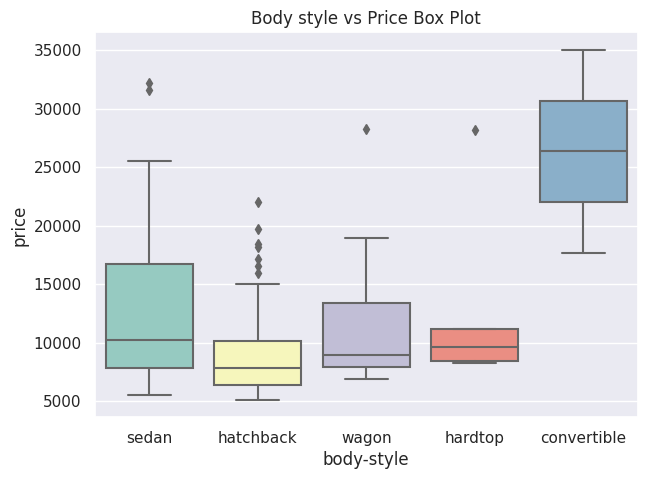

In [15]:
sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')

**Question**

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?
According to Scatterplot:
Mercedes-benz is on first costliest.Jaguar is second costliest.Audi and volve come in te third place when it comes for costliest.

According to Boxplot:
Mercedes-benz is in first place.Jaguar is having less number of purchase but is on second place.Audi is third place but it is an outlier.Volve also has less number of people purchase.

According to Violin:
The plot is similar to the boxplot.

According to the Swarmplot:
The plot is similar to scatter but more clear compare to scatter plot.

According to boxplot:(The above mentioned 2nd boxplot with body-type)
1. Sedan minimum above 5000 and maximum is above 15000
2. Hatchback minimum 5000 and maximum is 15000
3. Wagon minimum around 7000 and maximum is around 12000
4. Hardtop minimum around 8000 and maximum is around 11000
5. Convertible minimum 17000 and maximum is 35000

Convertible is costliest.

2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

Convertible minimum 17000 and maximum is 35000.
Absolutely, considering the interquartile range (IQR) can significantly enhance the interpretation of data. Here are some specific ways in which incorporating the IQR improves interpretation:

1. *Robustness to Outliers*
2. *Identifying Skewness*
3. *Outlier Detection*
4. *Comparative Analysis*
5. *Resilience to Non-Normality*
6. *Sensitivity to Spread*
7. *Improved Visualization*

 3) Do you think the body-style of a car can be a good predictor for its price?

 The body-style of car of a car is good for prediction for its price.But there are other factors on which cars are been ranged in a price,the factors are as follows:
1. engine-size          
2. fuel-system        
3. bore               
4. stroke             
5. compression-ratio  
6. horsepower          
7. peak-rpm            
8. city-mpg             
9. highway-mpg        